# Project: Investigate a Dataset "No-show appointments" 

> Author: Ana Paula

In this project, I will be analysing data collected from a sample of 100k medical appointments in Brazil that includes some characteristics about patients and focused on the question of whether or not patients show up for their appointment.

Important information about the dataset:
<ul>
<li>‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
<li>‘Neighborhood’ indicates the location of the hospital.</li>
<li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
</ul>    


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#q1">Research Q1</a></li>
        <li><a href="#q2">Research Q2</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I want to answer questions related to which factors are important in order to predict if a patient will show up for a scheduled appointmment. 


<ul>

<li>Is the gender of the patient related to missing more appointments?</li>
<li>Is the age of the patient related to missing more appointments?</li>
</ul>   




In [120]:
# import statements for packages that I plan to use

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mp
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [121]:
# Load  data and print out a few lines. 

df = pd.read_csv('noshowappointments.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [122]:
# size of the dataframe

df.shape

(110527, 14)

In [123]:
# describe with more details the dataframe

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [124]:
# number of rows and columns, inspect data types, missing or possibly errant data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [125]:
# find duplicated rows
sum(df.duplicated())

0

### Data Cleaning

After inspecting the data, I understand there are no instances of missing or duplicated data. However, I don't need some of the columns and also some of their names can be changed.

In the following code lines, I'm going to drop some columns, rename others and remove capitalization.

In [126]:
# drop columns I won't need
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

#confirm changes 
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [127]:
# rename columns
df.rename(columns={'ScheduledDay':'scheduled_day',
                   'AppointmentDay':'appointment_day',
                   'No-show':'no_show'}, inplace=True)

#confirm changes 
df.head(1)

,Gender,scheduled_day,appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [128]:
# remove capitalization
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

#confirm changes 
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



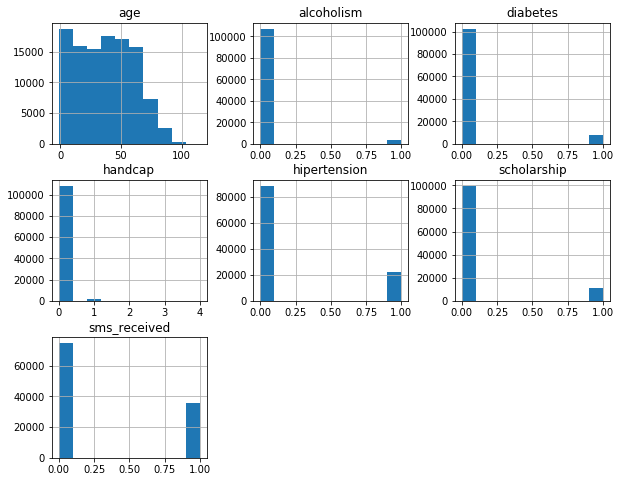

In [129]:
#Checking all data available in histograms
df.hist(figsize =( 10, 8));

Text(0, 0.5, 'Number of people')

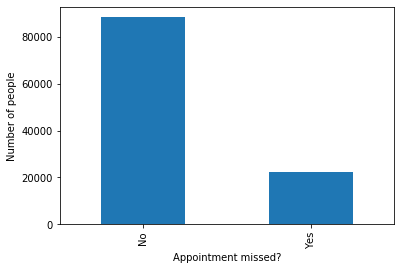

In [130]:
# bar plot to visualize how many people showed up or not for appointments.
df.no_show.value_counts().plot(kind='bar')
# Naming X and Y
plt.xlabel("Appointment missed?")
plt.ylabel("Number of people")

<a id='q1'></a>
### Research Question 1: Is the gender of the patient related to missing more appointments?

To answer this question, I created a pivot table crossing the count of Male and Female patients and the no_show data.

In [131]:
# pivot table gender and no show
df.pivot_table(index='gender',columns='no_show', aggfunc='count')['age']

no_show,No,Yes
gender,,
F,57246,14594
M,30962,7725


According to the table above, there are:
<li>57246 women who showed up for the scheduled appointment and 14594 who didn't</li>
<li>30962 men who showed up and 7725 who didn't </li>



In [132]:
# calculation of percentage of (yes) no show per gender
# created a variable called 'answer1'
answer1=100*df.pivot_table(index='gender',columns='no_show', aggfunc='count')['age']['Yes'] /df.pivot_table(index='gender',columns='no_show', aggfunc='count')['age'].sum(axis=1)
print(answer1)


gender
F    20.314588
M    19.967948
dtype: float64


This pivot table shows that:
    <li>20.3% of women don't show up for appoitments </li>
    <li>19.9% of men don't show up for appointments </li>


Text(0, 0.5, 'No show %')

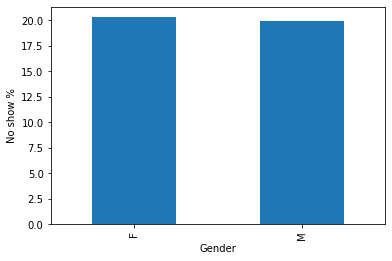

In [133]:
#used the variable created above to display a bar plot
answer1.plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("No show %")

    
#### Answer from Question 1    
We cannot assume the gender of the patient is related to missing more appointments, because the difference of show and no show per gender is less than 1%

---

<a id='q2'></a>
### Research Question 2 - Is the age of the patient related to missing more appointments?

To answer this question, I'm going to do two experiments:
1. Age Group
2. Mean of patients' ages

Startin with the Age Group experiment, first I'm going to divide the age data into **age groups** with the following criteria:

<li>Ages 0 to 12: child</li>
<li>Ages 13 to 17: teenager</li> 
<li>Ages 18 to 60: adult</li> 
<li>Ages 60 to 100: elderly</li> 

In [134]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0, 13, 18, 60, 100]

In [135]:
# Labels for age groups
bin_names = ['child', 'teenager', 'adult', 'elderly']

In [136]:
# Creates age group column
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_group
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,elderly
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,adult
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,elderly
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,child
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,adult


Now that the age group column is added, I'm going to count and visualize this new data.

In [137]:
# Find the count of each age group per no show with groupby
cnt_age = df.groupby('age_group').no_show.value_counts()
print(cnt_age)

age_group  no_show
child      No         14629
           Yes         3971
teenager   No          4990
           Yes         1737
adult      No         48932
           Yes        12966
elderly    No         16752
           Yes         3003
Name: no_show, dtype: int64


Text(0, 0.5, 'patients')

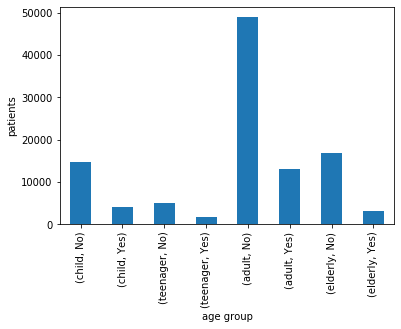

In [138]:
# used the variable created above to display a bar chart to visualize the data 
cnt_age.plot(kind='bar')
plt.xlabel("age group")
plt.ylabel("patients")

Now that I created the age group and visualized the data, I'm going to count and calculate the percentages, so it will be easier to compare and draw conclusions.

In [139]:
# count of no show by age group

ns_age = df.groupby(['age_group','no_show']).agg({'no_show':'count'})
print(ns_age)

                   no_show
age_group no_show         
child     No         14629
          Yes         3971
teenager  No          4990
          Yes         1737
adult     No         48932
          Yes        12966
elderly   No         16752
          Yes         3003


In [140]:
# total count by age group

ns_age_total = df.groupby(['age_group']).agg({'no_show':'count'})
print(ns_age_total)

           no_show
age_group         
child        18600
teenager      6727
adult        61898
elderly      19755


In [141]:
# percentage of no show per age group

ns_pct = 100*ns_age/ns_age_total
print(ns_pct)

                     no_show
age_group no_show           
child     No       78.650538
          Yes      21.349462
teenager  No       74.178683
          Yes      25.821317
adult     No       79.052635
          Yes      20.947365
elderly   No       84.798785
          Yes      15.201215


Text(0, 0.5, 'percentage')

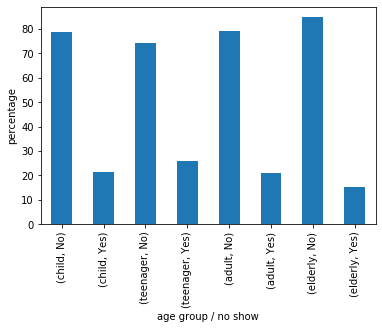

In [142]:
# display a bar chart with the percentages
ns_pct.plot(kind='bar', legend=None)
plt.xlabel("age group / no show")
plt.ylabel("percentage")

##### First conclusion 

According to the chart above, the age group that missed more appointments is the Teenager group, with 25% of absence, while the group that missed the least amount was the elderlies with only 15% no show.



Another way to double check this tendency is to do the average age of patients who show and who don't show for the appointments.

In [143]:
#groupby to find out the average of age of patients

df.groupby(by='no_show')['age'].mean()

no_show
No     37.790064
Yes    34.317667
Name: age, dtype: float64

This numbers above show that:
    <li>37 years old is the average age of patients who show up for appointments </li>
    <li>34 years old is the average age of patients who don't show up for appointments </li>

##### Second conclusion 

The mean of the ages of patients who don't show up to appointments is 3 years younger than the mean of the ages of patients who show up.

#### Answer from Question 2

There is a tendency of younger people attending scheduled medical appointments less than older people, as noticed by the Age Group experiment. This assumption was confirmed by the mean of the ages of patients experiment as well.


---

<a id='conclusions'></a>
## Conclusions


In this project, with a data sample of 100k medical appointments in Brazil, I wanted to understand which factors (if any) are important in order to predict if a patient will show up for a scheduled appointmment. From my two proposed questions, I reached to the following conclusions:

### Is the gender of the patient related to missing more appointments?

A: Due to the fact that the difference of show and no show per gender is less than 1%,  we cannot draw conclusions about the connection between the gender and whether the patient will show up or not for a medical appointment.

    
### Is the age of the patient related to missing more appointments?

A: Yes. There is a tendency that teenagers will miss more appointments than older people. 10% more teenagers don't show up for their scheduled medical appointments, compared to elderly.
  
